In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv('hpc_breakdowns.csv')
df

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
2049275,2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [2]:
df['date_time'] = df[['Date', 'Time']].apply(tuple, axis=1)
df

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,"(16/12/2006, 17:24:00)"
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,"(16/12/2006, 17:25:00)"
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,"(16/12/2006, 17:26:00)"
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,"(16/12/2006, 17:27:00)"
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,"(16/12/2006, 17:28:00)"
...,...,...,...,...,...,...,...,...,...,...,...
2049275,2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,"(26/11/2010, 20:58:00)"
2049276,2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,"(26/11/2010, 20:59:00)"
2049277,2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,"(26/11/2010, 21:00:00)"
2049278,2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,"(26/11/2010, 21:01:00)"


In [3]:
ndf=df.drop(['Date','Time'], axis = 1) 
ndf

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,"(16/12/2006, 17:24:00)"
1,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,"(16/12/2006, 17:25:00)"
2,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,"(16/12/2006, 17:26:00)"
3,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,"(16/12/2006, 17:27:00)"
4,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,"(16/12/2006, 17:28:00)"
...,...,...,...,...,...,...,...,...,...
2049275,2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,"(26/11/2010, 20:58:00)"
2049276,2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,"(26/11/2010, 20:59:00)"
2049277,2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,"(26/11/2010, 21:00:00)"
2049278,2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,"(26/11/2010, 21:01:00)"


In [4]:
ndf1= ndf[['date_time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
ndf1

,date_time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,"(16/12/2006, 17:24:00)",4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,"(16/12/2006, 17:25:00)",5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,"(16/12/2006, 17:26:00)",5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,"(16/12/2006, 17:27:00)",5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,"(16/12/2006, 17:28:00)",3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2049275,"(26/11/2010, 20:58:00)",0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,"(26/11/2010, 20:59:00)",0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,"(26/11/2010, 21:00:00)",0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,"(26/11/2010, 21:01:00)",0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [5]:
#Checking Duplicate Value
ndf1[ndf1.duplicated(['date_time'], keep=False)]

,date_time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [6]:
ndf2=ndf1.drop(['date_time'], axis = 1) 
ndf2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [7]:
ndf2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
ndf2.shape

(2049280, 7)

In [9]:
test_data=ndf2[1849280:2049281]
test_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,0.376,0.214,238.32,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [10]:
train_data=ndf2[0:1849280]
train_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
1849275,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,0.376,0.204,236.15,1.8,0.0,0.0,1.0


In [11]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849280 entries, 0 to 1849279
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 98.8 MB
None


In [12]:
#Resetting the index,to assure the
train_data.reset_index(inplace=True,drop=True)
train_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
1849275,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,0.376,0.204,236.15,1.8,0.0,0.0,1.0


In [13]:
train_data.isnull().sum()

Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [14]:
print(train_data['Global_active_power'].value_counts(dropna=False))
print(train_data['Global_reactive_power'].value_counts(dropna=False))
print(train_data['Voltage'].value_counts(dropna=False))
print(train_data['Global_intensity'].value_counts(dropna=False))
print(train_data['Sub_metering_1'].value_counts(dropna=False))
print(train_data['Sub_metering_2'].value_counts(dropna=False))
print(train_data['Sub_metering_3'].value_counts(dropna=False))

0.218    9245
0.216    9045
0.220    8779
0.222    8614
0.224    8482
         ... 
7.536       1
7.260       1
9.732       1
8.932       1
8.444       1
Name: Global_active_power, Length: 4181, dtype: int64
0.000    444686
0.100     20106
0.098     20047
0.096     20033
0.102     19972
          ...  
1.186         1
0.952         1
1.180         1
1.044         1
0.976         1
Name: Global_reactive_power, Length: 530, dtype: int64
241.18    3176
241.02    2884
241.12    2873
241.53    2870
241.35    2868
          ... 
224.74       1
224.24       1
223.99       1
223.49       1
223.85       1
Name: Voltage, Length: 2835, dtype: int64
1.0     154372
1.4     150368
1.2     123211
1.6     101474
1.8      85680
         ...  
42.2         1
43.2         1
42.6         1
40.6         1
48.4         1
Name: Global_intensity, Length: 221, dtype: int64
0.0     1692593
1.0       77792
2.0       17553
38.0      15273
37.0      13858
         ...   
82.0          3
87.0          3
88.0       

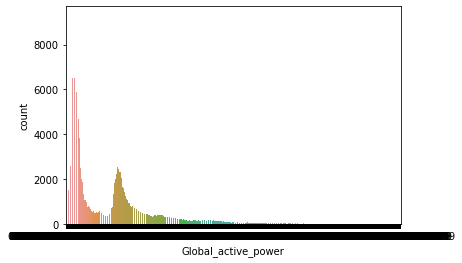

In [15]:
sns.countplot(x='Global_active_power',data=train_data)
plt.show()

In [16]:
Global_active_power_Null=train_data[train_data['Global_active_power'].isnull()].index.tolist()
print(Global_active_power_Null)

[7944, 7945, 7946, 7947, 7948, 7949, 7950, 7951, 7952, 7953, 7954, 7955, 7956, 7957, 7958, 7959, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 29481, 29482, 29483, 29484, 29485, 29486, 29487, 29488, 29489, 29490, 29491, 29492, 29493, 29494, 29495, 29496, 29497, 29498, 29499, 29500, 29501, 29502, 29503, 29504, 29505, 29506, 29507, 64740, 64741, 64742, 64743, 64744, 64745, 64746, 64747, 64748, 64749, 64750, 64751, 64752, 64753, 64754, 64755, 64756, 64757, 64758, 64759, 64760, 64761, 64762, 64763, 64764, 64765, 64766, 64767, 64768, 64769, 64770, 64771, 64772, 64773, 64774, 64775, 64776, 64777, 64778, 64779, 64780, 64781, 64782, 64783, 64784, 64785, 64786, 114187, 114188, 114189, 114190, 114191, 114192, 114193, 114194, 114195, 114196, 114197, 114198, 114199, 114200, 114201, 114202, 114203, 114204, 114205, 114206, 114207, 114208, 114209, 114210, 114211, 114212, 114213, 114214, 114215, 114216, 114217, 114218, 114219, 114220, 114221, 114222, 114223, 114224, 114

In [17]:
median_value=train_data['Global_active_power'].median()

In [18]:
train_data['Global_active_power'].iloc[Global_active_power_Null]=median_value

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
Global_active_power_Null=train_data[train_data['Global_active_power'].isnull()].index.tolist()
print(Global_active_power_Null)

[]


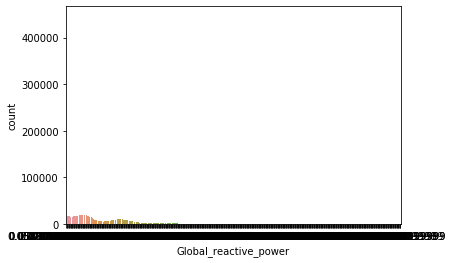

In [20]:
sns.countplot(x='Global_reactive_power',data=train_data)
plt.show()

In [21]:
Global_reactive_power_Null=train_data[train_data['Global_reactive_power'].isnull()].index.tolist()
print(Global_reactive_power_Null)

[251237, 251238, 251239, 251240, 251241, 251242, 251243, 251244, 251245, 251246, 251247, 251248, 251249, 251250, 251251, 251252, 251253, 251254, 251255, 251256, 251257, 251258, 251259, 251260, 251261, 251262, 251263, 251264, 251265, 251266, 251267, 251268, 251269, 251270, 251271, 251272, 251273, 251274, 251275, 251276, 266921, 266922, 266923, 266924, 266925, 266926, 266927, 266928, 266929, 266930, 266931, 266932, 266933, 266934, 266935, 266936, 266937, 266938, 266939, 266940, 266941, 266942, 266943, 266944, 266945, 266946, 266947, 266948, 266949, 266950, 266951, 266952, 266953, 266954, 266955, 286205, 286206, 286207, 286208, 286209, 286210, 286211, 286212, 286213, 286214, 286215, 286216, 286217, 286218, 286219, 286220, 286221, 286222, 286223, 286224, 286225, 286226, 286227, 286228, 286229, 286230, 286231, 286232, 286233, 286234, 286235, 286236, 286237, 286238, 286239, 286240, 286241, 286242, 286243, 286244, 286245, 286246, 286247, 286248, 286249, 286250, 286251, 286252, 286253, 286254,

In [22]:
median_value=train_data['Global_reactive_power'].median()

In [23]:
train_data['Global_reactive_power'].iloc[Global_reactive_power_Null]=median_value

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
Global_reactive_power_Null=train_data[train_data['Global_reactive_power'].isnull()].index.tolist()
print(Global_reactive_power_Null)

[]


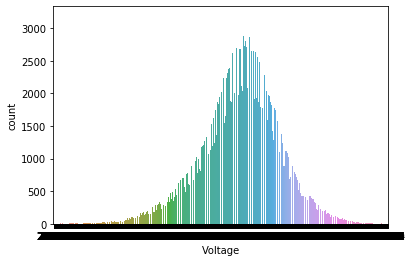

In [25]:
sns.countplot(x='Voltage',data=train_data)
plt.show()

In [26]:
Voltage_Null=train_data[train_data['Voltage'].isnull()].index.tolist()
print(Voltage_Null)

[37780, 37781, 37782, 37783, 37784, 37785, 37786, 37787, 37788, 37789, 37790, 37791, 37792, 37793, 37794, 37795, 37796, 37797, 37798, 37799, 37800, 37801, 37802, 37803, 37804, 37805, 37806, 37807, 37808, 37809, 37810, 37811, 37812, 101184, 101185, 101186, 101187, 101188, 101189, 101190, 101191, 101192, 101193, 101194, 101195, 101196, 101197, 101198, 101199, 101200, 101201, 101202, 101203, 101204, 101205, 101206, 101207, 101208, 101209, 101210, 101211, 101212, 101213, 101214, 101215, 101216, 101217, 101218, 101219, 101220, 101221, 101222, 101223, 101224, 101225, 101226, 101227, 126272, 126273, 126274, 126275, 126276, 126277, 126278, 126279, 126280, 126281, 126282, 126283, 126284, 126285, 126286, 126287, 126288, 126289, 126290, 126291, 126292, 126293, 126294, 126295, 126296, 126297, 126298, 126299, 126300, 126301, 126302, 126303, 126304, 126305, 126306, 126307, 126308, 126309, 126310, 126311, 126312, 126313, 126314, 126315, 126316, 126317, 126318, 126319, 126320, 126321, 126322, 126323, 

In [27]:
median_value=train_data['Voltage'].median()

In [28]:
train_data['Voltage'].iloc[Voltage_Null]=median_value

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
Voltage_Null=train_data[train_data['Voltage'].isnull()].index.tolist()
print(Voltage_Null)

[]


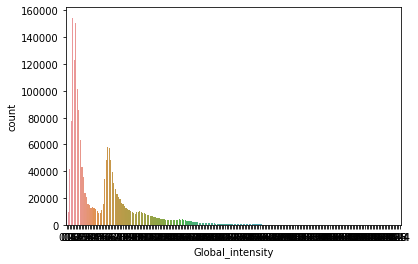

In [30]:
sns.countplot(x='Global_intensity',data=train_data)
plt.show()

In [31]:
Global_intensity_Null=train_data[train_data['Global_intensity'].isnull()].index.tolist()
print(Global_intensity_Null)

[7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7775, 7776, 7777, 14229, 14230, 14231, 14232, 14233, 14234, 14235, 14236, 14237, 14238, 14239, 14240, 14241, 14242, 14243, 14244, 14245, 14246, 14247, 14248, 14249, 14250, 14251, 14252, 14253, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264, 14265, 14266, 14267, 14268, 14269, 14270, 14271, 14272, 14273, 14274, 14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 38637, 38638, 38639, 38640, 38641, 38642, 38643, 38644, 38645, 38646, 38647, 38648, 38649, 38650, 38651, 38652, 38653, 38654, 38655, 38656, 38657, 83197, 83198, 83199, 83200, 83201, 83202, 83203, 83204, 83205, 83206, 83207, 83208, 83209, 83210, 83211, 83212, 83213, 83214, 83215, 83216, 83217, 83218, 83

In [32]:
median_value=train_data['Global_intensity'].median()

In [33]:
train_data['Global_intensity'].iloc[Global_intensity_Null]=median_value

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
Global_intensity_Null=train_data[train_data['Global_intensity'].isnull()].index.tolist()
print(Global_intensity_Null)

[]


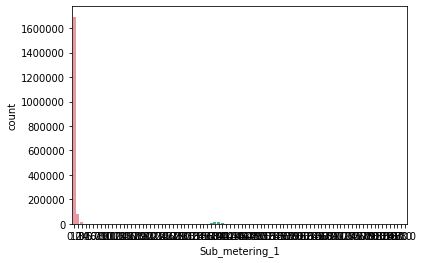

In [35]:
sns.countplot(x='Sub_metering_1',data=train_data)
plt.show()

In [36]:
Sub_metering_1_Null=train_data[train_data['Sub_metering_1'].isnull()].index.tolist()
print(Sub_metering_1_Null)

[6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6983, 6984, 6985, 20724, 20725, 20726, 20727, 20728, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20745, 20746, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20759, 20760, 20761, 20762, 20763, 20764, 20765, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25241, 25242, 25243, 25244, 25245, 25246, 25247, 25248, 25249, 25250, 25251, 38261, 38262, 38263, 38264, 38265, 38266, 38267, 38268, 38269, 38270, 38271, 38272, 38273, 38274, 38275, 44950, 44951, 44952, 44953, 44954, 44955, 44956, 44957, 44958, 44959, 44960, 44961, 44962, 44963, 44964, 44965, 44966, 44967, 44968, 44969, 44970, 44971, 44972, 44973, 44974, 44

In [37]:
median_value=train_data['Sub_metering_1'].median()

In [38]:
train_data['Sub_metering_1'].iloc[Sub_metering_1_Null]=median_value

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
Sub_metering_1_Null=train_data[train_data['Sub_metering_1'].isnull()].index.tolist()
print(Sub_metering_1_Null)

[]


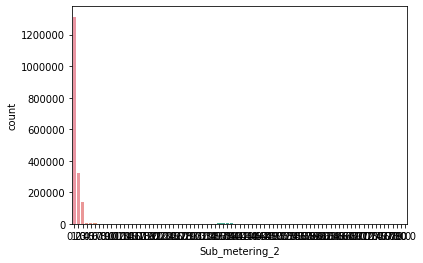

In [40]:
sns.countplot(x='Sub_metering_2',data=train_data)
plt.show()

In [41]:
Sub_metering_2_Null=train_data[train_data['Sub_metering_2'].isnull()].index.tolist()
print(Sub_metering_2_Null)

[203049, 203050, 203051, 203052, 203053, 203054, 203055, 203056, 203057, 203058, 203059, 203060, 203061, 203062, 203063, 203064, 203065, 203066, 203067, 203068, 203069, 203070, 203071, 203072, 203073, 203074, 203075, 203076, 203077, 203078, 203079, 203080, 203081, 203082, 203083, 282650, 282651, 282652, 282653, 282654, 282655, 282656, 282657, 282658, 282659, 282660, 282661, 282662, 282663, 282664, 282665, 282666, 282667, 282668, 282669, 282670, 282671, 282672, 282673, 282674, 282675, 297115, 297116, 297117, 297118, 297119, 297120, 297121, 297122, 297123, 297124, 297125, 297126, 297127, 297128, 297129, 297130, 297131, 297132, 297133, 297134, 297135, 297136, 298124, 298125, 298126, 298127, 298128, 298129, 298130, 298131, 298132, 298133, 298134, 298135, 298136, 298137, 298138, 444240, 444241, 444242, 444243, 444244, 444245, 444246, 444247, 444248, 444249, 444250, 444251, 444252, 444253, 444254, 444255, 444256, 444257, 444258, 558285, 558286, 558287, 558288, 558289, 558290, 558291, 558292,

In [42]:
train_data['Sub_metering_2'].iloc[Sub_metering_2_Null]=train_data['Sub_metering_2'].median()

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
Sub_metering_2_Null=train_data[train_data['Sub_metering_2'].isnull()].index.tolist()
print(Sub_metering_2_Null)

[]


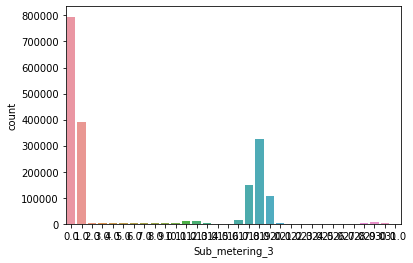

In [44]:
sns.countplot(x='Sub_metering_3',data=train_data)
plt.show()

In [45]:
Sub_metering_3_Null=train_data[train_data['Sub_metering_3'].isnull()].index.tolist()
print(Sub_metering_3_Null)

[301662, 301663, 301664, 301665, 301666, 301667, 301668, 301669, 301670, 301671, 301672, 359814, 359815, 359816, 359817, 359818, 359819, 359820, 359821, 359822, 359823, 359824, 359825, 359826, 671900, 671901, 671902, 671903, 671904, 671905, 671906, 671907, 671908, 671909, 671910, 671911, 671912, 671913, 671914, 671915, 671916, 671917, 671918, 671919, 671920, 671921, 671922, 671923, 671924, 671925, 671926, 671927, 671928, 671929, 671930, 671931, 671932, 671933, 671934, 671935, 671936, 671937, 671938, 671939, 671940, 671941, 671942, 671943, 671944, 671945, 671946, 671947, 671948, 671949, 671950, 671951, 671952, 671953, 671954, 671955, 671956, 1824557, 1824558, 1824559, 1824560, 1824561, 1824562, 1824563, 1824564, 1824565, 1824566, 1824567, 1824568, 1824569, 1824570, 1824571, 1824572, 1824573, 1824574, 1824575, 1824576, 1824577, 1824578, 1824579, 1824580, 1824581, 1824582, 1824583, 1824584, 1824585, 1824586, 1824587, 1824588, 1824589, 1824590, 1824591, 1824592, 1824593, 1824594, 1824595, 

In [46]:
train_data['Sub_metering_3'].iloc[Sub_metering_3_Null]=train_data['Sub_metering_3'].median()

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
Sub_metering_3_Null=train_data[train_data['Sub_metering_3'].isnull()].index.tolist()
print(Sub_metering_3_Null)

[]


In [48]:
train_data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

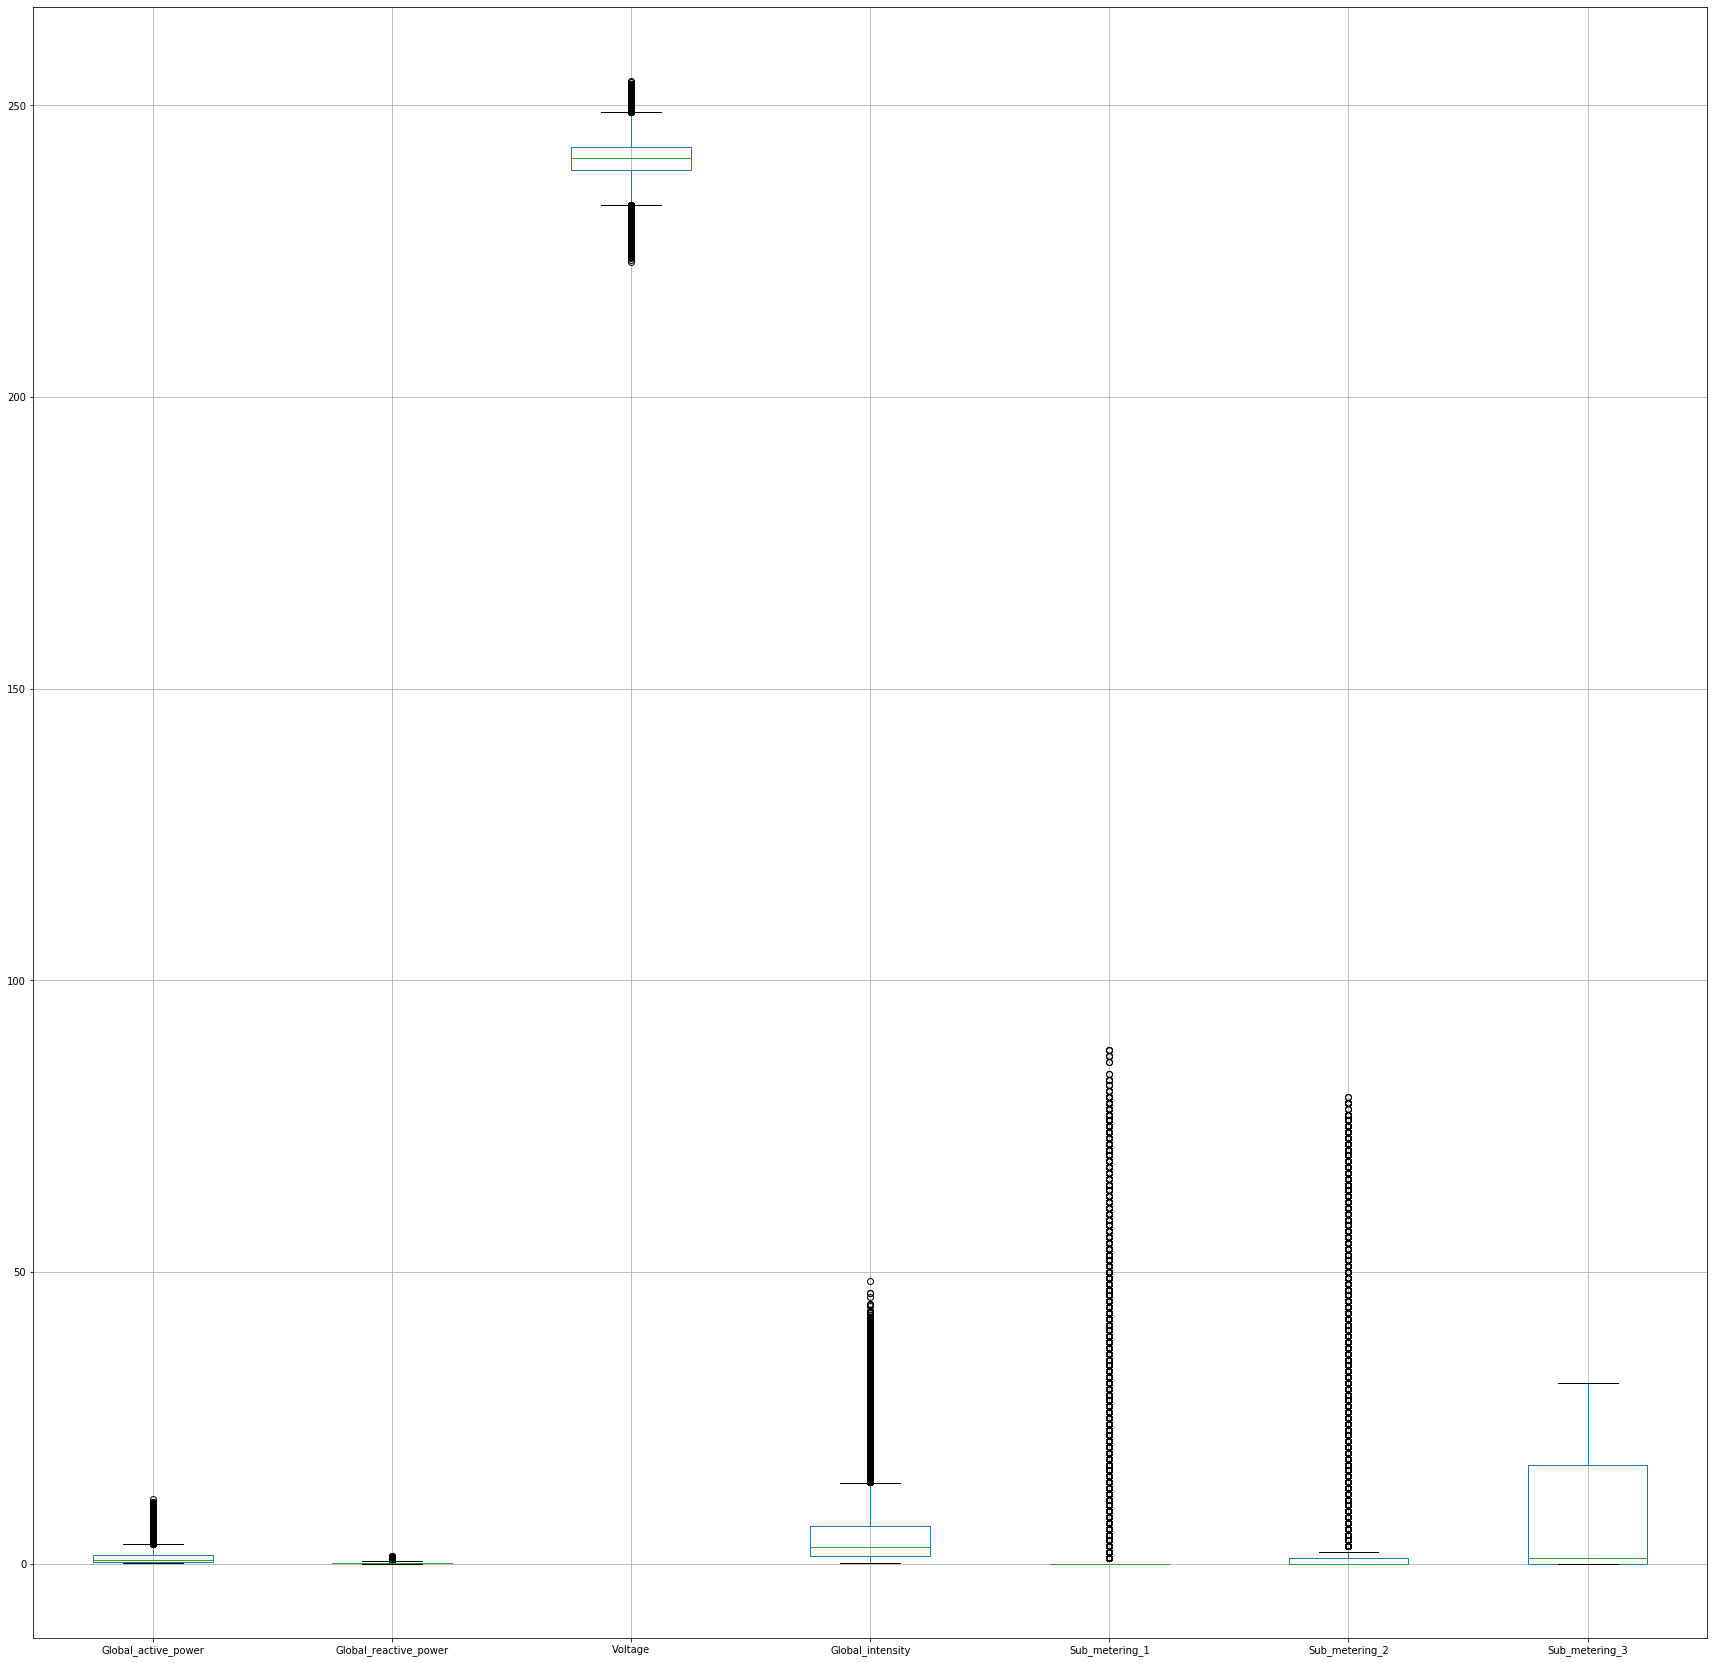

In [49]:
train_data.boxplot(figsize=(30,30))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

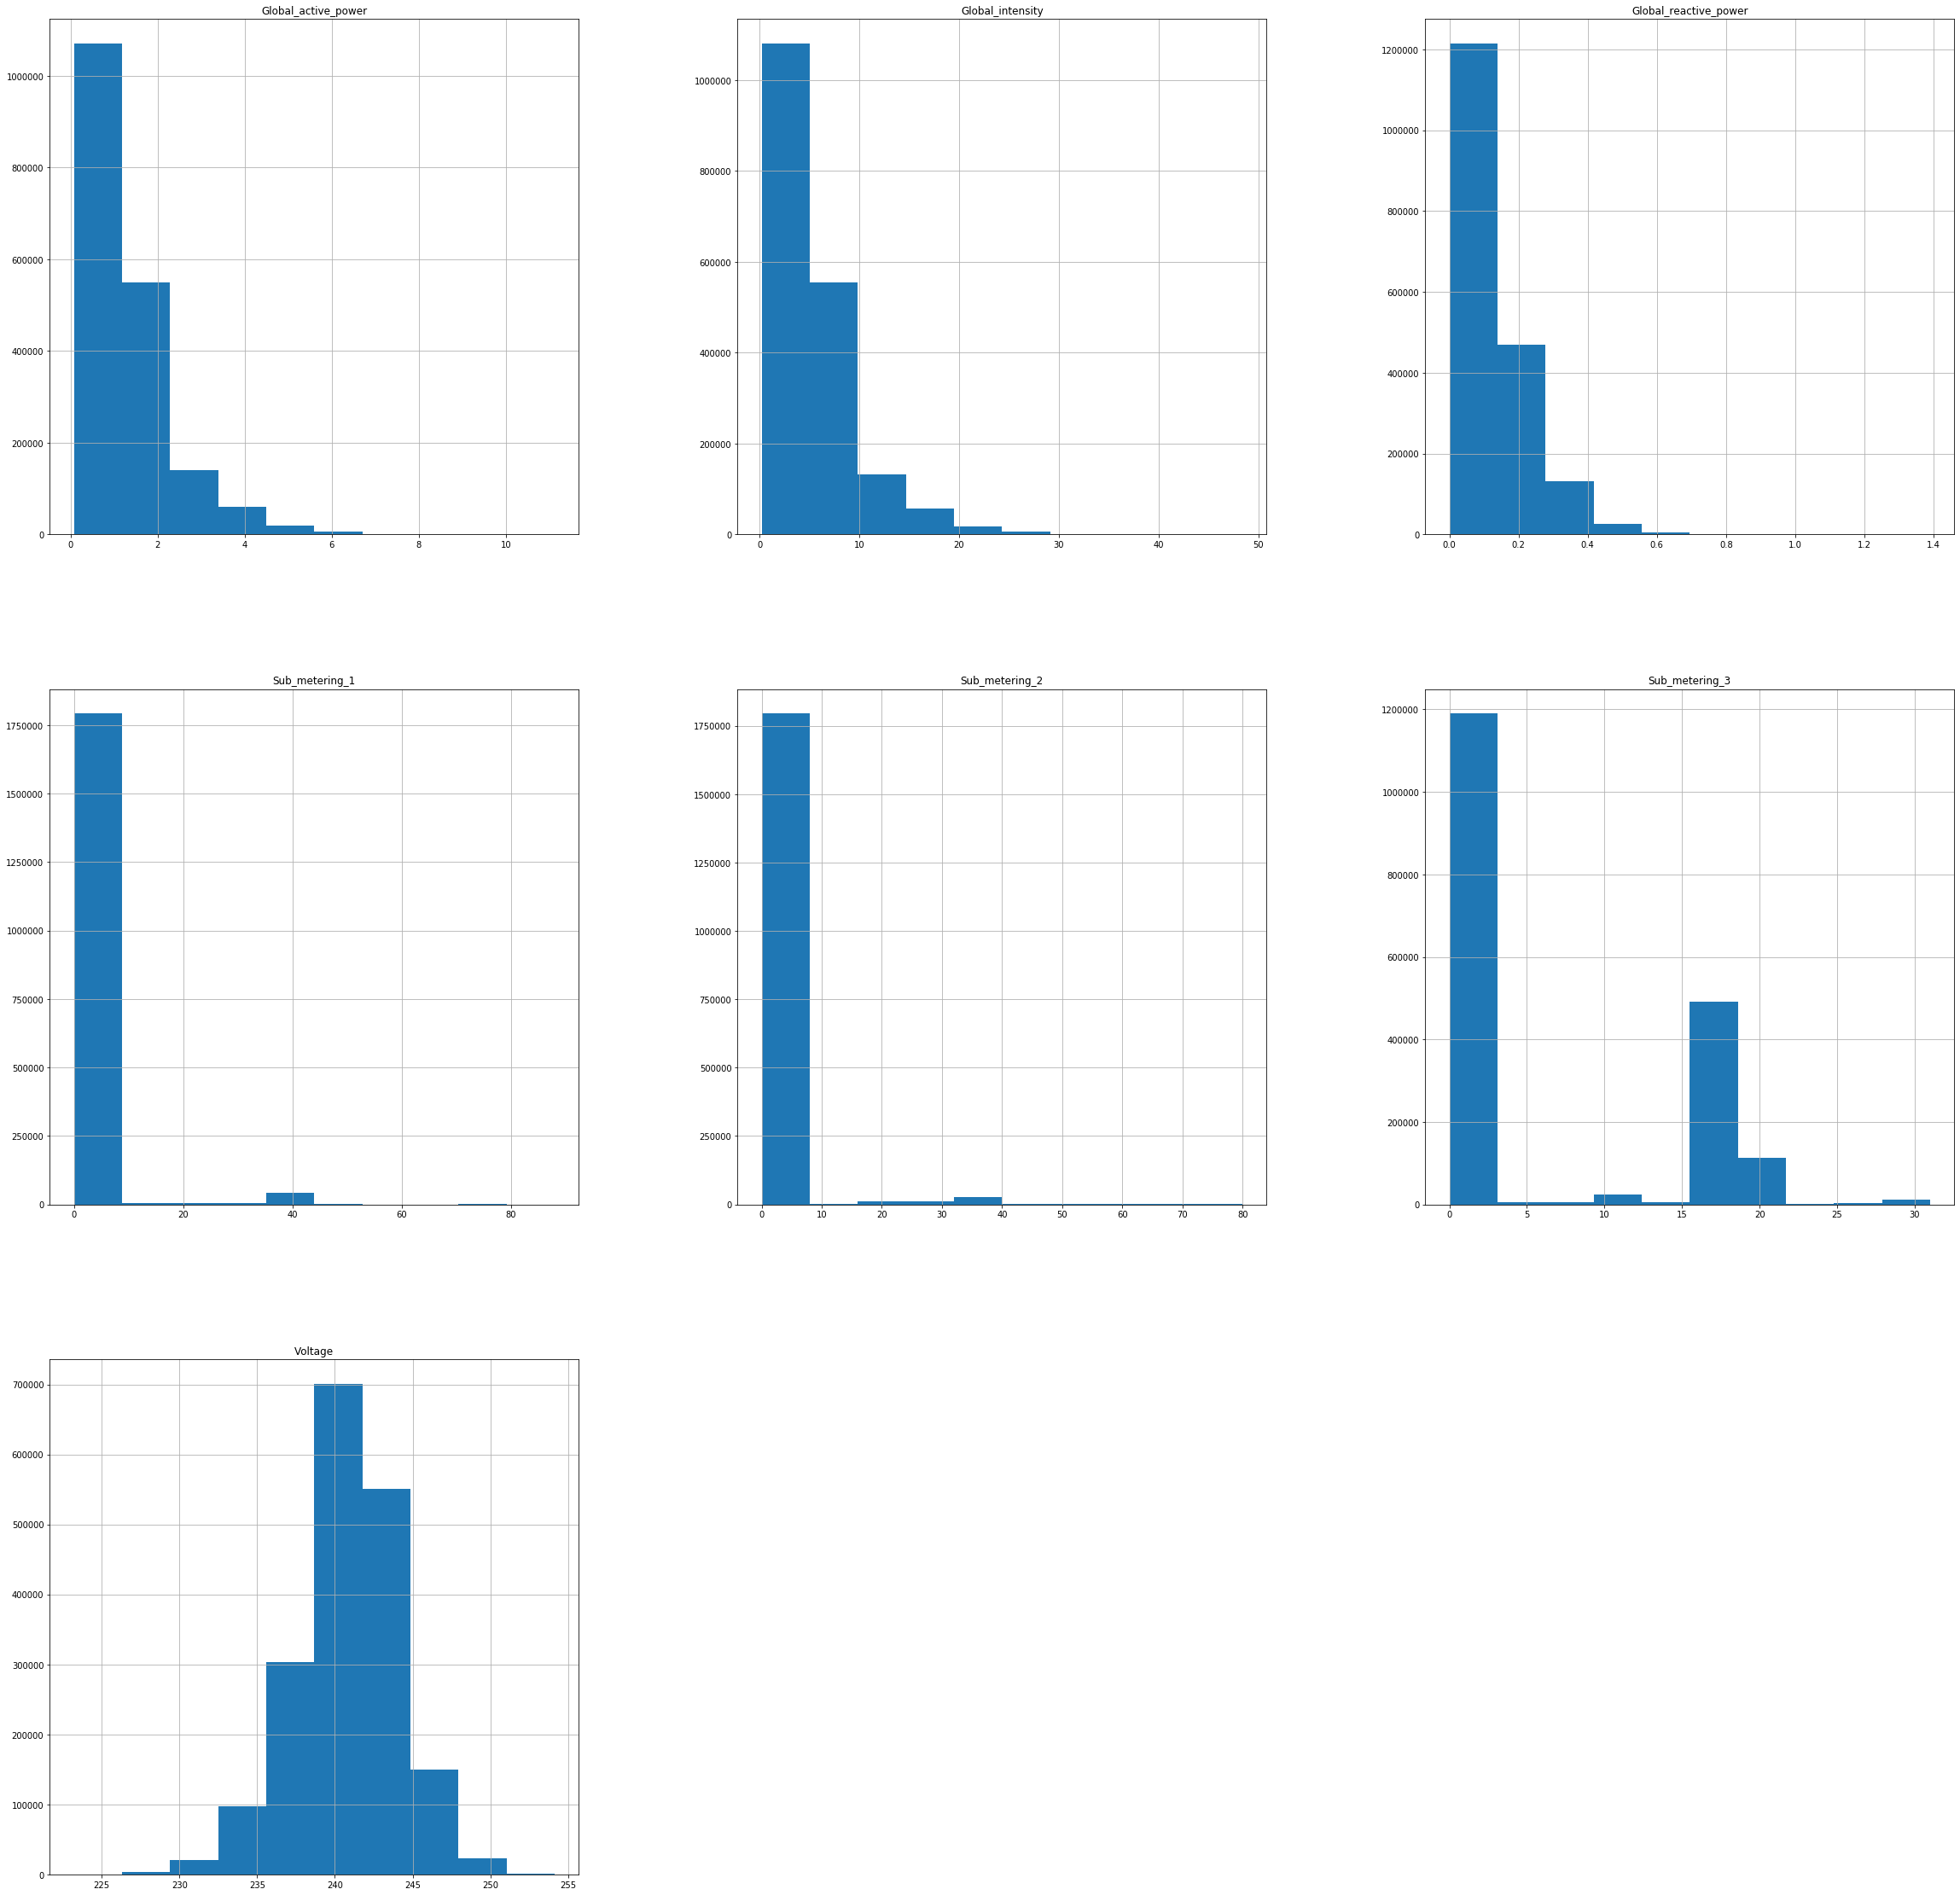

In [50]:
train_data.hist(figsize=(40,40))
plt.show

In [51]:
train_data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.249809,-0.397366,0.997769,0.485310,0.436981,0.634513
Global_reactive_power,0.249809,1.000000,-0.115980,0.268264,0.130664,0.140111,0.084314
Voltage,-0.397366,-0.115980,1.000000,-0.409121,-0.196526,-0.168934,-0.264368
Global_intensity,0.997769,0.268264,-0.409121,1.000000,0.489749,0.443110,0.622287
Sub_metering_1,0.485310,0.130664,-0.196526,0.489749,1.000000,0.055716,0.104497
Sub_metering_2,0.436981,0.140111,-0.168934,0.443110,0.055716,1.000000,0.080662
Sub_metering_3,0.634513,0.084314,-0.264368,0.622287,0.104497,0.080662,1.000000


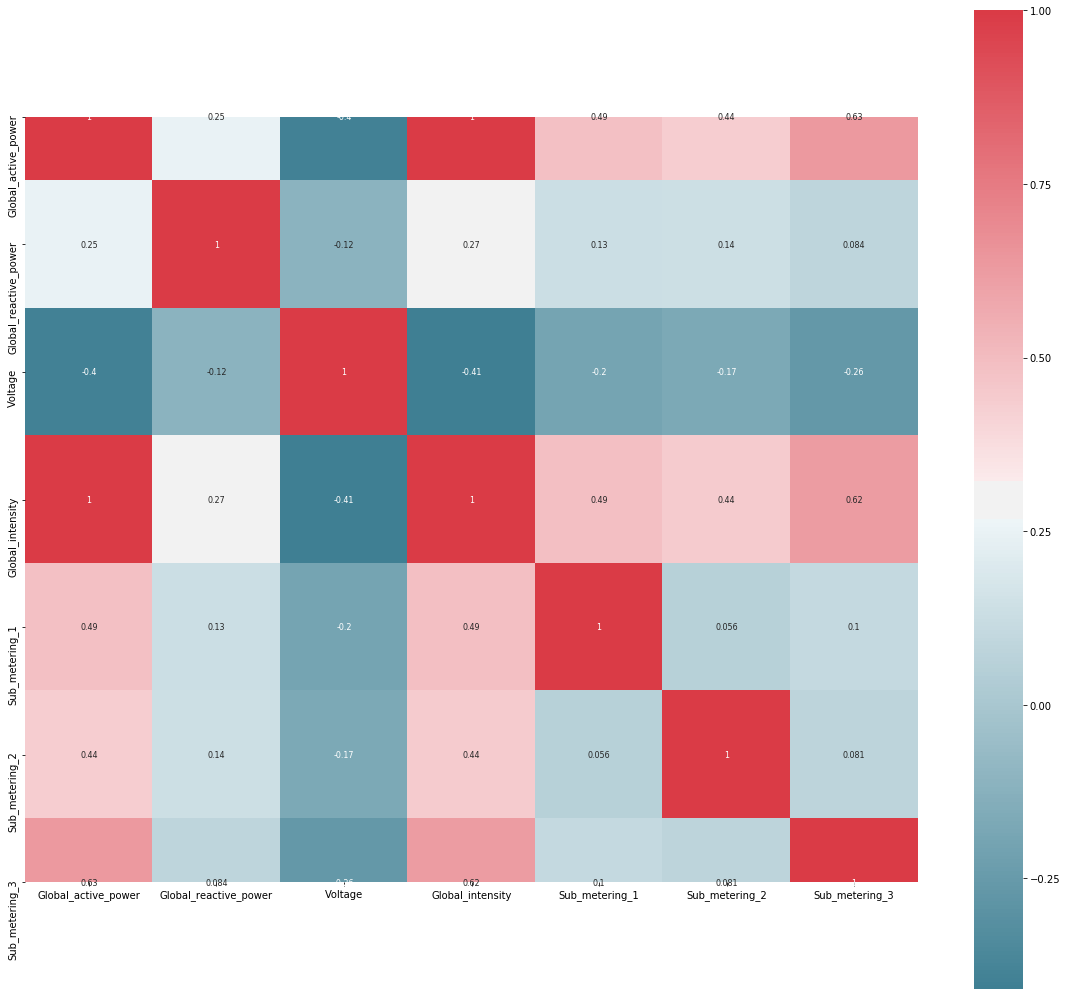

In [52]:
#plot co-relation heat map

def plot_correlation_map( HEAT_MAP ):
    corr = train_data.corr()
    _ , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )
plot_correlation_map( train_data )

In [53]:
train_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [54]:
train_data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849275,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,0.376,0.204,236.15,1.8,0.0,0.0,1.0
1849279,0.374,0.202,235.70,1.8,0.0,0.0,0.0


In [55]:
train_data['Global_intensity'] = train_data['Global_intensity'].apply(lambda Global_intensity: 1 if Global_intensity >15 else 0)
train_data

C:\Users\PABITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,1,0.0,1.0,17.0
1,5.360,0.436,233.63,1,0.0,1.0,16.0
2,5.374,0.498,233.29,1,0.0,2.0,17.0
3,5.388,0.502,233.74,1,0.0,1.0,17.0
4,3.666,0.528,235.68,1,0.0,1.0,17.0
...,...,...,...,...,...,...,...
1849275,0.450,0.322,236.90,0,0.0,2.0,1.0
1849276,0.386,0.216,236.69,0,0.0,0.0,0.0
1849277,0.378,0.204,236.54,0,0.0,0.0,1.0
1849278,0.376,0.204,236.15,0,0.0,0.0,1.0


In [56]:
X=train_data.drop(columns=['Global_intensity'])
Y=train_data['Global_intensity']

In [57]:
X

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,0.0,1.0,17.0
1,5.360,0.436,233.63,0.0,1.0,16.0
2,5.374,0.498,233.29,0.0,2.0,17.0
3,5.388,0.502,233.74,0.0,1.0,17.0
4,3.666,0.528,235.68,0.0,1.0,17.0
...,...,...,...,...,...,...
1849275,0.450,0.322,236.90,0.0,2.0,1.0
1849276,0.386,0.216,236.69,0.0,0.0,0.0
1849277,0.378,0.204,236.54,0.0,0.0,1.0
1849278,0.376,0.204,236.15,0.0,0.0,1.0


In [58]:
Y

0          1
1          1
2          1
3          1
4          1
          ..
1849275    0
1849276    0
1849277    0
1849278    0
1849279    0
Name: Global_intensity, Length: 1849280, dtype: int64

In [59]:
#FeatureScalling
#MinMaxScaler
import pandas,scipy,numpy
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
rescaledX[0:5,:]

array([[0.37479631, 0.30071942, 0.37609047, 0.        , 0.0125    ,
        0.5483871 ],
       [0.47836321, 0.31366906, 0.33699515, 0.        , 0.0125    ,
        0.51612903],
       [0.47963064, 0.35827338, 0.32600969, 0.        , 0.025     ,
        0.5483871 ],
       [0.48089806, 0.36115108, 0.34054927, 0.        , 0.0125    ,
        0.5483871 ],
       [0.32500453, 0.37985612, 0.40323102, 0.        , 0.0125    ,
        0.5483871 ]])

In [60]:
#FeatureScalling
#Standardizing Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
rescaledX[0:5,:]

array([[ 2.89277256,  2.63187   , -1.81535009, -0.18472361, -0.05590669,
         1.23702729],
       [ 3.95787951,  2.79223187, -2.18383993, -0.18472361, -0.05590669,
         1.11891515],
       [ 3.97091404,  3.34458943, -2.28738252, -0.18472361,  0.11192356,
         1.23702729],
       [ 3.98394856,  3.3802254 , -2.15034085, -0.18472361, -0.05590669,
         1.23702729],
       [ 2.38070191,  3.61185921, -1.55953897, -0.18472361, -0.05590669,
         1.23702729]])

In [61]:
#FeatureScalling
#Normaliizing Data
from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(X)
normalizedX=scaler.transform(X)
normalizedX[0:5,:]

array([[0.01790273, 0.00177499, 0.9972197 , 0.        , 0.00424638,
        0.07218845],
       [0.02288241, 0.00186133, 0.99739112, 0.        , 0.00426911,
        0.06830569],
       [0.02296784, 0.00212839, 0.99705366, 0.        , 0.00854776,
        0.07265597],
       [0.02298419, 0.00214144, 0.99709075, 0.        , 0.00426581,
        0.07251879],
       [0.01551264, 0.00223423, 0.99727718, 0.        , 0.00423149,
        0.0719353 ]])

In [62]:
#Train & Test Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((1479424, 6), (369856, 6))

In [63]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# LOGISTICS REGRESSION ALGORITHM

In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Users\PABITRA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print('log_reg: {}'.format(log_reg.score(X_test, Y_test)))

log_reg: 0.9985237497836996


In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
Y_predict=log_reg.predict(X_test)

In [68]:
print(confusion_matrix(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[354922    298]
 [   248  14388]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    355220
           1       0.98      0.98      0.98     14636

    accuracy                           1.00    369856
   macro avg       0.99      0.99      0.99    369856
weighted avg       1.00      1.00      1.00    369856



# DECISION TREE ALGORITHM

In [69]:
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
Y_pred=classifier.predict(X_test)

In [71]:
print('classifier: {}'.format(classifier.score(X_test, Y_test)))

classifier: 0.9988806454403876


In [72]:
results=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
results

,Actual,Predicted
19535,0,0
46796,0,0
5825,1,1
115985,1,1
1641970,0,0
...,...,...
1625186,0,0
1511158,0,0
1824275,0,0
482809,0,0


In [73]:
((results.Actual-results.Predicted)**2).mean()**.5

0.033456756561453915

In [74]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[354980    240]
 [   174  14462]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    355220
           1       0.98      0.99      0.99     14636

    accuracy                           1.00    369856
   macro avg       0.99      0.99      0.99    369856
weighted avg       1.00      1.00      1.00    369856



# SUPPORT VECTOR CLASSIFIER

In [75]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
Y_predi=svclassifier.predict(X_test)
Y_predi

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [85]:
results=pd.DataFrame({'Actual':Y_test,'Predicted':Y_predi})
results

,Actual,Predicted
19535,0,0
46796,0,0
5825,1,1
115985,1,1
1641970,0,0
...,...,...
1625186,0,0
1511158,0,0
1824275,0,0
482809,0,0


In [77]:
print(confusion_matrix(Y_test,Y_predi))
print(classification_report(Y_test,Y_predi))

[[354970    250]
 [   257  14379]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    355220
           1       0.98      0.98      0.98     14636

    accuracy                           1.00    369856
   macro avg       0.99      0.99      0.99    369856
weighted avg       1.00      1.00      1.00    369856



In [78]:
print('svclassifier: {}'.format(svclassifier.score(X_test, Y_test)))

svclassifier: 0.9986291962277211


# RANDOM FOREST ALGORITHM

In [79]:
#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [80]:
#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [86]:
Y_predic=rf_best.predict(X_test)
Y_predic

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [87]:
print('rf: {}'.format(rf_best.score(X_test, Y_test)))

rf: 0.9992645786468247


In [82]:
((results.Actual-results.Predicted)**2).mean()**.5

0.033456756561453915

In [88]:
results=pd.DataFrame({'Actual':Y_test,'Predicted':Y_predic})
results

,Actual,Predicted
19535,0,0
46796,0,0
5825,1,1
115985,1,1
1641970,0,0
...,...,...
1625186,0,0
1511158,0,0
1824275,0,0
482809,0,0


In [89]:
print(confusion_matrix(Y_test,Y_predic))
print(classification_report(Y_test,Y_predic))

[[355107    113]
 [   159  14477]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    355220
           1       0.99      0.99      0.99     14636

    accuracy                           1.00    369856
   macro avg       1.00      0.99      1.00    369856
weighted avg       1.00      1.00      1.00    369856

